In [373]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import pandas as pd
import os 
import csv


# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata = pd.merge(study_results, mouse_metadata)
 
# Display the data table for preview
mousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [374]:
mouse_ct = mouse_metadata['Mouse ID'].count()
mouse_ct

249

In [375]:
mouse_metadata = mouse_metadata.drop_duplicates() 
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [376]:
num_mouse = len(mouse_metadata["Mouse ID"].unique())
num_mouse


249

In [377]:
drug_name = mouse_metadata.groupby(["Mouse ID"])
dg_name = drug_name["Drug Regimen"]
dg_name

In [378]:
# # Mean Tumor Volume
# Median Tumor Volume
# Tumor Volume Variance
# Tumor Volume Std. Dev.
# Tumor Volume Std. Err.

In [379]:
drug_type = mousedata['Drug Regimen'].value_counts()
drug_type

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [380]:
DGF = pd.DataFrame({"Number of mice per drug":drug_type})
DGF

,Number of mice per drug
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


In [381]:
drug = mousedata.groupby(["Drug Regimen"]).mean()
drug_mean = drug["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [382]:
drug = mousedata.groupby(["Drug Regimen"]).median()
drug_median = drug["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [383]:
drug = mousedata.groupby(["Drug Regimen"]).var()
drug_var = drug["Tumor Volume (mm3)"]
drug_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [384]:
drug = mousedata.groupby(["Drug Regimen"]).std()
drug_std = drug["Tumor Volume (mm3)"]
drug_std


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [385]:
drug = mousedata.groupby(["Drug Regimen"]).sem()
drug_ste = drug["Tumor Volume (mm3)"]
drug_ste

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [386]:
drug_frame = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                           "Median Tumor Volume":drug_median,
                           "Tumor Volume Variance":drug_var,
                           "Tumor Volume Std. Dev.":drug_std,
                           "Tumor Volume Std. Err.":drug_ste
                          })
drug_frame

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



In [388]:
drug_ammount = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(drug_ammount))

TypeError: 'str' object is not callable

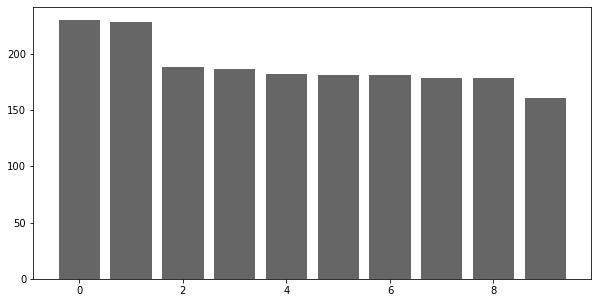

In [389]:
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_ammount, color='black', alpha=0.6, align="center")
plt.title("Number Of Mice Per Drug")
plt.xlabel("Drugs")
plt.ylabel("Amount of Mice")
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'nfubinol', 'Ketapril', 'Naftisol', 'Placebo', 'ropriva', 'Ramicane', 'Stelasyn', 'zoniferol'], rotation="vertical")

In [390]:
data = {"Drug Regimine":['Capomulin', 'Ceftamin', 'nfubinol', 'Ketapril',
         'Naftisol', 'Placebo', 'ropriva', 'Ramicane', 'Stelasyn', 'zoniferol'],
       "Number of unique mice tested":[230, 228, 188, 186, 182, 181, 181, 178, 178, 161]}


In [391]:
dataframe = pd.DataFrame(data=data);

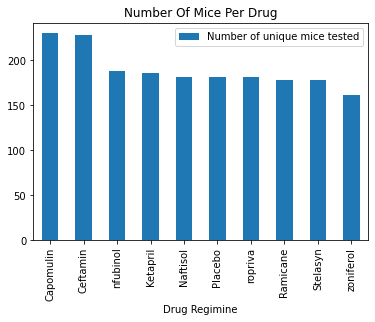

In [392]:
dataframe.plot.bar(y="Number of unique mice tested", x="Drug Regimine", title="Number Of Mice Per Drug");

In [393]:
m_sex = mousedata["Sex"].value_counts()
m_sex

Male      958
Female    935
Name: Sex, dtype: int64

In [394]:
f_sex = mousedata["Sex"].count()
f_sex


1893

In [395]:
division = m_sex / f_sex *100
division

Male      50.607501
Female    49.392499
Name: Sex, dtype: float64

In [396]:
labels = ["Male", "Female"]
sizes = [958, 935]
colors = ["gray", "yellow"]
explode = (.01, 0)

([<matplotlib.patches.Wedge at 0x7f814479c160>,
 [Text(-0.6971369233990093, -0.8637708666271189, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.3831112822282844, -0.4746848906689572, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

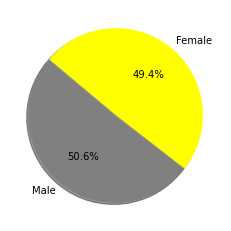

In [397]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=140)


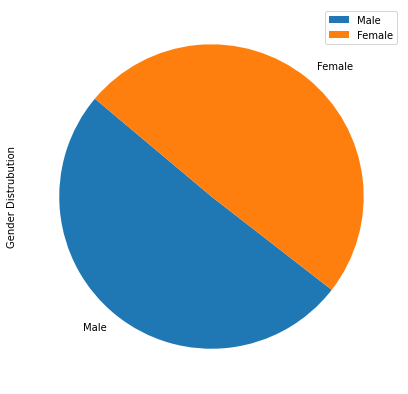

In [398]:
df = pd.DataFrame({'Gender Distrubution': m_sex},
                  index=['Male', 'Female'])
plot = df.plot.pie(y='Gender Distrubution', figsize=(7,7) ,startangle=140)


In [399]:
tumor_loc = mousedata.loc[:,["Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
tumor_loc

,Drug Regimen,Tumor Volume (mm3),Timepoint
0,Capomulin,45.000000,0
1,Capomulin,45.651331,5
2,Capomulin,43.270852,10
3,Capomulin,43.784893,15
4,Capomulin,42.731552,20
...,...,...,...
1888,Capomulin,33.118756,25
1889,Capomulin,31.758275,30
1890,Capomulin,30.834357,35
1891,Capomulin,31.378045,40


In [400]:
tum = tumor_loc.groupby(["Drug Regimen"]).sum()
tumv = tum["Tumor Volume (mm3)"]
tumv


Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8423.930878
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [401]:
drtm = tumv.drop([ 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'])
drtm 

Drug Regimen
Capomulin    9355.420462
Ceftamin     9361.228582
Infubinol    9413.493529
Ramicane     9169.417875
Name: Tumor Volume (mm3), dtype: float64

In [402]:
timetum = tumor_loc.groupby(["Drug Regimen"]).max() 
time = timetum["Timepoint"]
time

Drug Regimen
Capomulin    45
Ceftamin     45
Infubinol    45
Ketapril     45
Naftisol     45
Placebo      45
Propriva     45
Ramicane     45
Stelasyn     45
Zoniferol    45
Name: Timepoint, dtype: int64

In [403]:
cdd = mousedata.loc[mousedata["Drug Regimen"] == "Capomulin",:]
rd = mousedata.loc[mousedata["Drug Regimen"] == "Ramicane",:]
id = mousedata.loc[mousedata["Drug Regimen"] == "Infubinol",:]
cd = mousedata.loc[mousedata["Drug Regimen"] == "Ceftamin",:]

In [404]:
cdd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [405]:
cls = cdd.groupby('Mouse ID').max()['Timepoint']
cl = pd.DataFrame(cls)
c = pd.merge(cl, mousedata, on=("Mouse ID", "Timepoint"), how="left")
c.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [406]:
tumor_vol_list = c["Tumor Volume (mm3)"]
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulins {lower_bound} and {upper_bound}")

Capomulins 32.818911426250004 and 71.19095325625


In [407]:
RDS = rd.groupby('Mouse ID').max()['Timepoint']
RD = pd.DataFrame(RDS)
D = pd.merge(RD, mousedata, on=("Mouse ID", "Timepoint"), how="left")
D.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [408]:
tumor_vol_list2 = D["Tumor Volume (mm3)"]
quartiles = tumor_vol_list2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane {lower_bound} and {upper_bound}")

Ramicane 17.912664470000003 and 54.30681135


In [409]:
IDS = id.groupby('Mouse ID').max()['Timepoint']
IS = pd.DataFrame(IDS)
I = pd.merge(IS, mousedata, on=("Mouse ID", "Timepoint"), how="left")
I.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [410]:
tumor_vol_list3 = I["Tumor Volume (mm3)"]
quartiles = tumor_vol_list3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane {lower_bound} and {upper_bound}")

Ramicane 36.83290494999999 and 82.74144559000001


In [411]:
CDDS = id.groupby('Mouse ID').max()['Timepoint']
CDS  = pd.DataFrame(CDDS)
CD = pd.merge(CDS, mousedata, on=("Mouse ID", "Timepoint"), how="left")
CD.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [412]:
tumor_vol_list4 = CD["Tumor Volume (mm3)"]
quartiles = tumor_vol_list4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75] 
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane {lower_bound} and {upper_bound}")

Ramicane 36.83290494999999 and 82.74144559000001


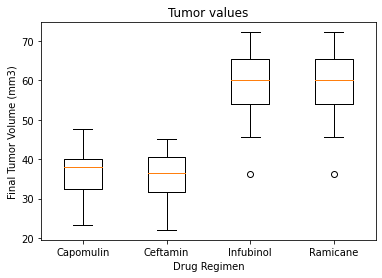

In [413]:
box_plot = [tumor_vol_list, tumor_vol_list2, tumor_vol_list3, tumor_vol_list4]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor values')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_plot, labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane",])     
plt.show()

In [414]:
cdd


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [415]:
line = cdd.loc[cdd["Mouse ID"] == "1509"]
line.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [416]:
x_axis = line["Timepoint"]
tz = line["Tumor Volume (mm3)"]

plt.title('Capomuline treatment of mouse 1509')
plt.plot(x_axis, tz, linewidth=1, markersize=3)
plt.xlabel('TimePoint')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

TypeError: 'str' object is not callable

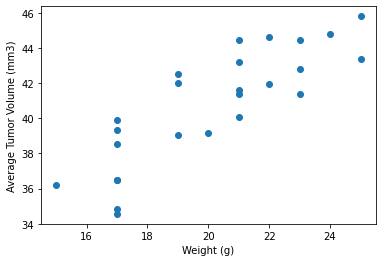

In [417]:
cap = cdd.groupby(['Mouse ID']).mean()
plt.scatter(cap['Weight (g)'],cap['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

In [418]:
y_values = cap['Weight (g)']*mslope+bintercept
plt.scatter(cap['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(cap['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()

NameError: name 'mslope' is not defined